# Problem Statement
Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

Auto Insurance company is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering CLV as a parameter to classify loyal customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv(r"C:\Users\abhin\Downloads\ML\AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [4]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [7]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [8]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

In [9]:
numerical_cols.describe()


,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [10]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\440849046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CLV"])


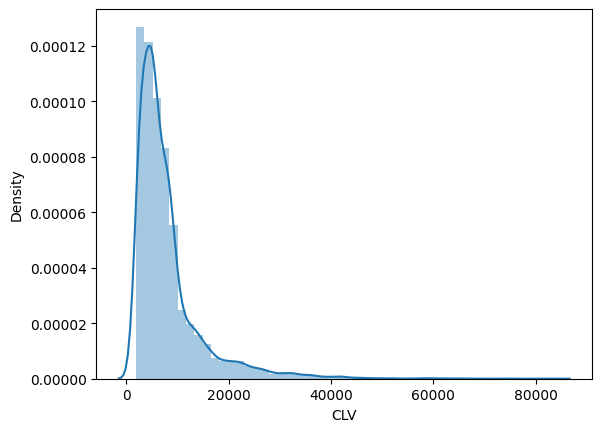

In [11]:
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

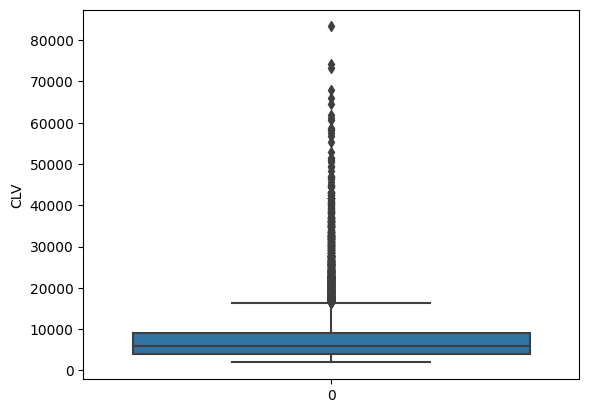

In [12]:
sns.boxplot(df["CLV"])
plt.ylabel("CLV")
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\3289545506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


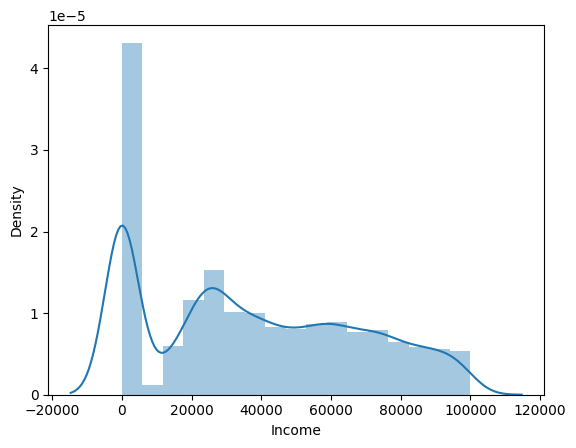

In [13]:
sns.distplot(df["Income"])
plt.show()

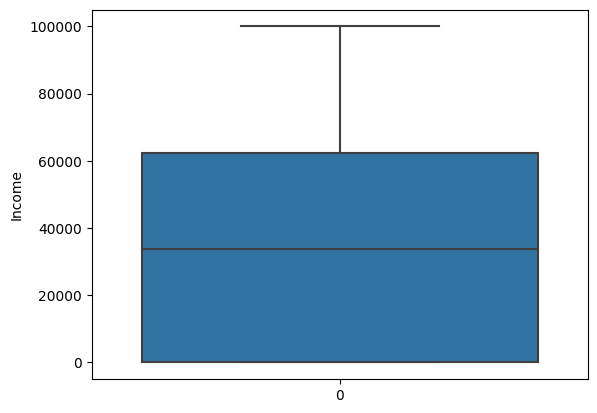

In [14]:
sns.boxplot(df["Income"])
plt.ylabel("Income")
plt.show()

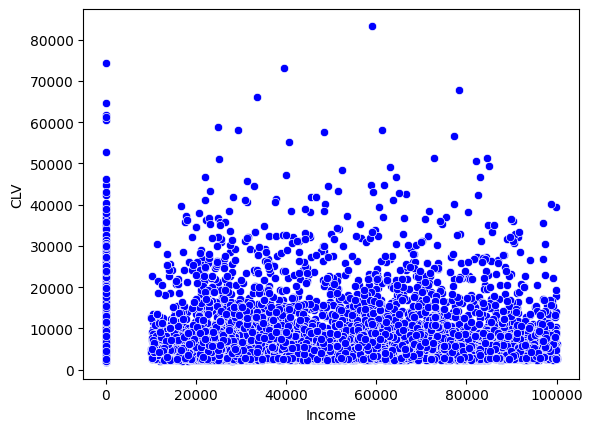

In [15]:
sns.scatterplot(data=df,x="Income",y="CLV",color='b')
# plt.savefig("bi.png")
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\1342115661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly Premium Auto"],color='c')


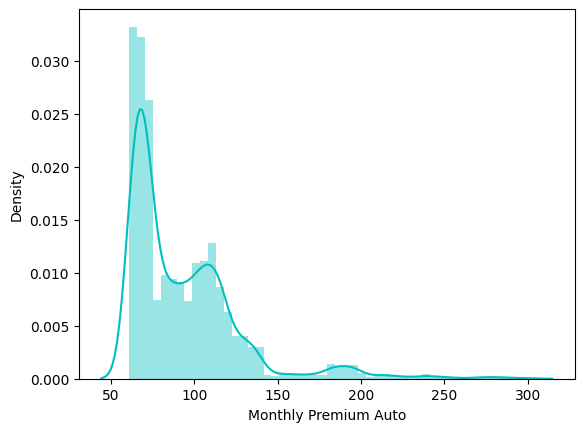

In [16]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

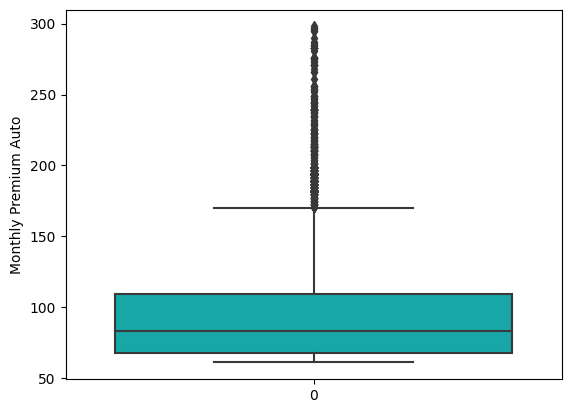

In [17]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.ylabel("Monthly Premium Auto")
plt.show()

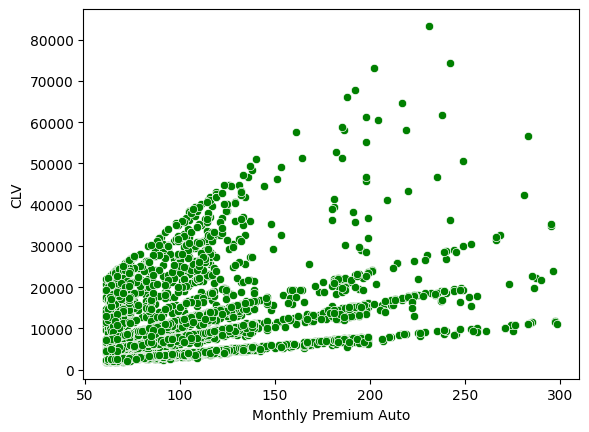

In [18]:
sns.scatterplot(data=df,x="Monthly Premium Auto",y="CLV",color='g')
# plt.savefig("bi.png")
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\981008286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Last Claim'])


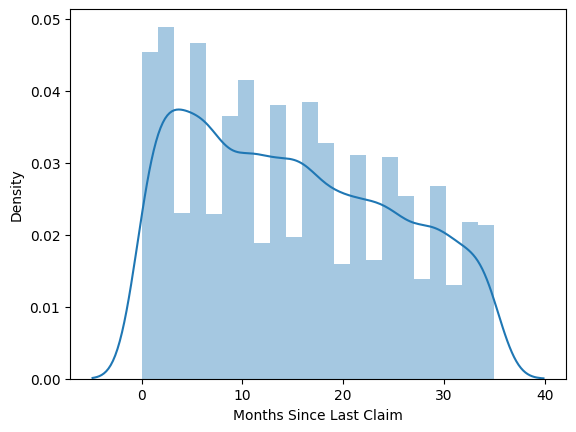

In [19]:
sns.distplot(df['Months Since Last Claim'])
plt.show()


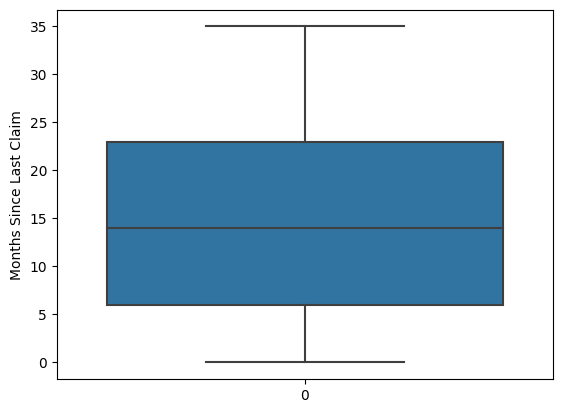

In [20]:
sns.boxplot(df["Months Since Last Claim"])
plt.ylabel("Months Since Last Claim")
plt.show()

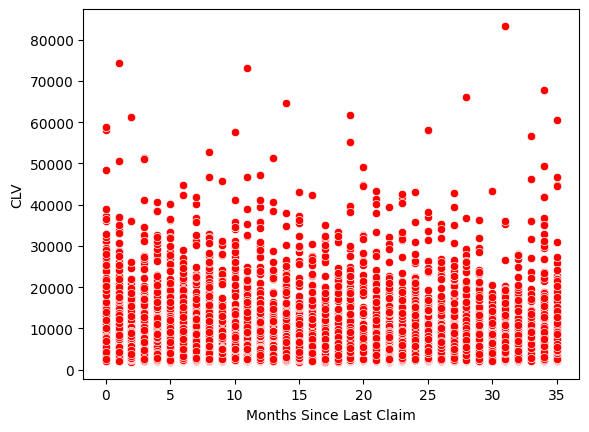

In [21]:
sns.scatterplot(data=df,x="Months Since Last Claim",y="CLV",color='r')
plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\2756715571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Policy Inception'])


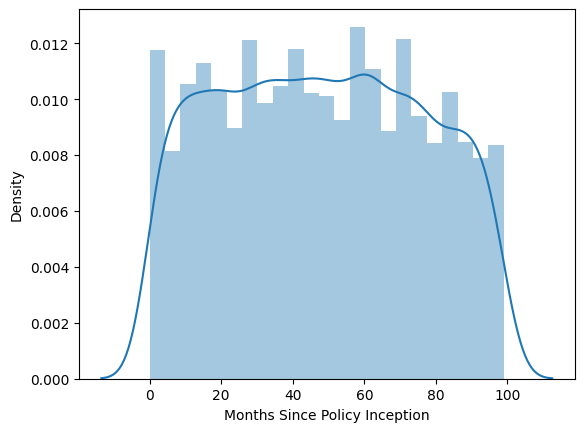

In [22]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

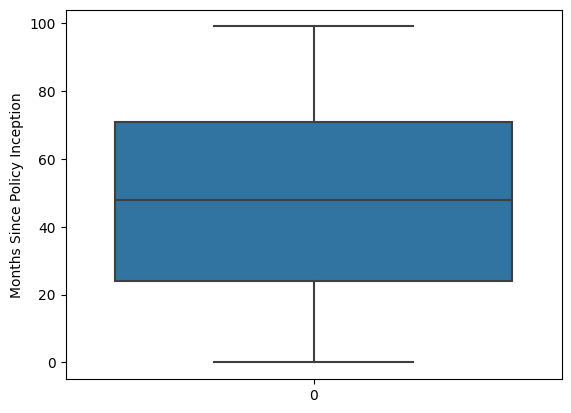

In [23]:
sns.boxplot(df["Months Since Policy Inception"])
plt.ylabel("Months Since Policy Inception")
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\3612461602.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Claim Amount'])


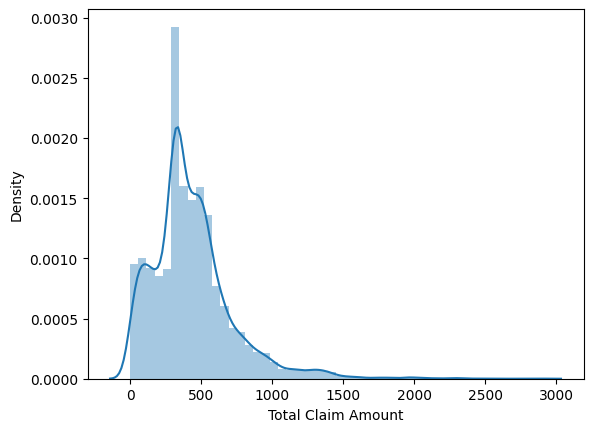

In [24]:
sns.distplot(df['Total Claim Amount'])
plt.show()

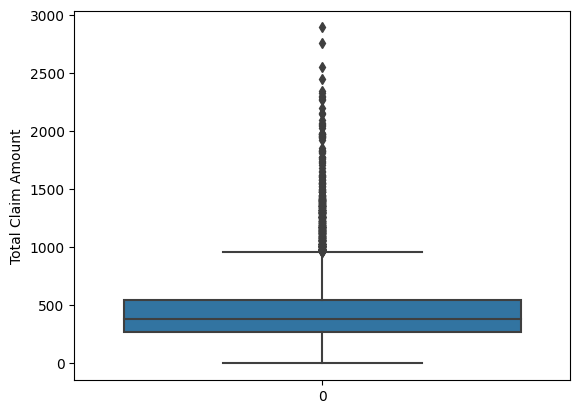

In [25]:
sns.boxplot(df["Total Claim Amount"])
plt.ylabel("Total Claim Amount")
plt.show()

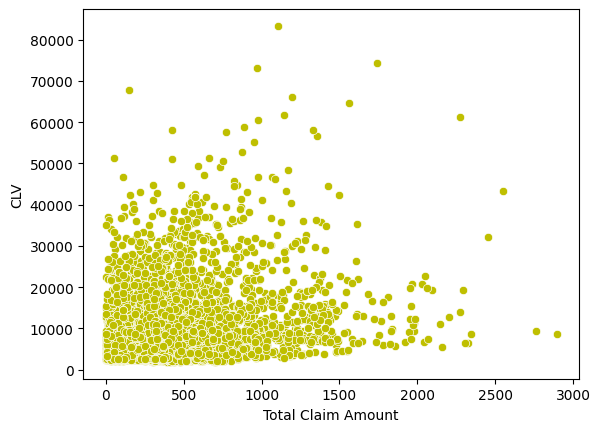

In [26]:
sns.scatterplot(data=df,x="Total Claim Amount",y="CLV",color='y')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\742992871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')


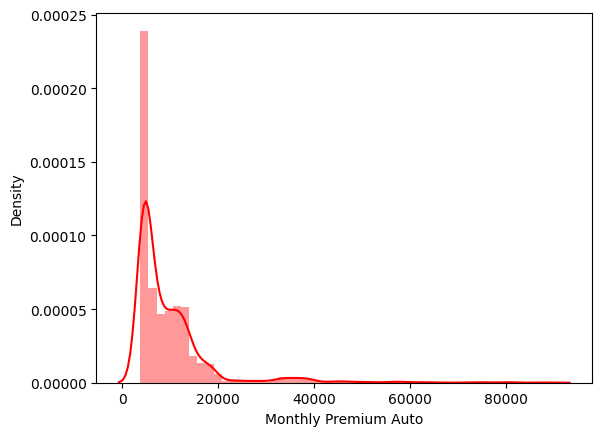

In [27]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\1182552602.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Income"]),color='r')


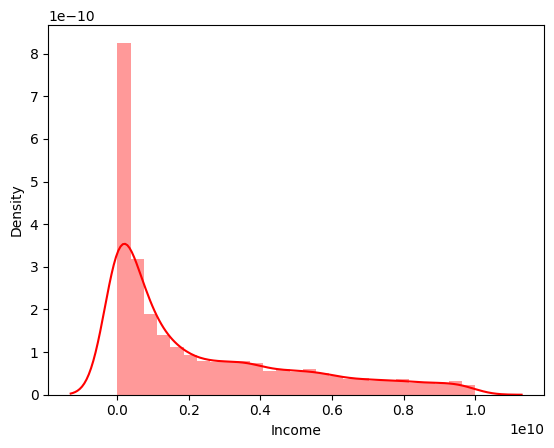

In [28]:
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

In [29]:
cat_cols = df.select_dtypes(include="object")

In [30]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [31]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [32]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [33]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [34]:
cat_cols.columns


Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [35]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

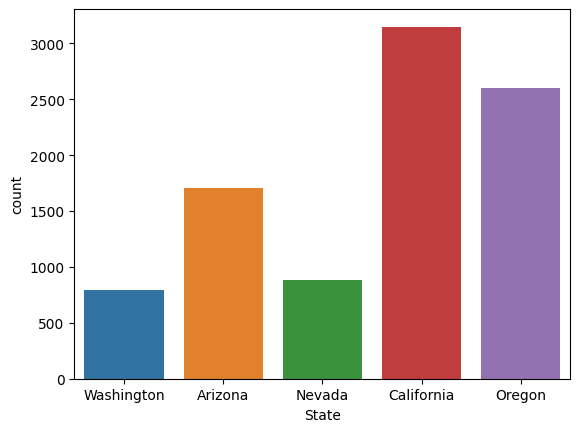

In [36]:
sns.countplot(x=df["State"])
plt.show()

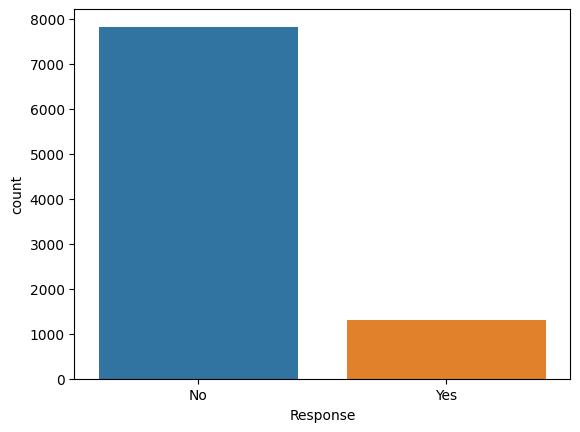

In [37]:
sns.countplot(x=df["Response"])
plt.show()

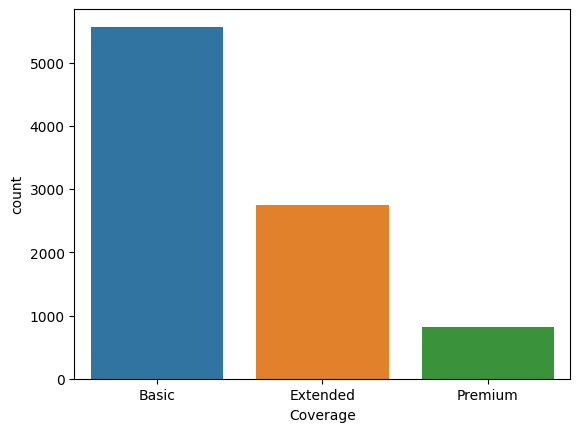

In [38]:
sns.countplot(x=df["Coverage"])
plt.show()

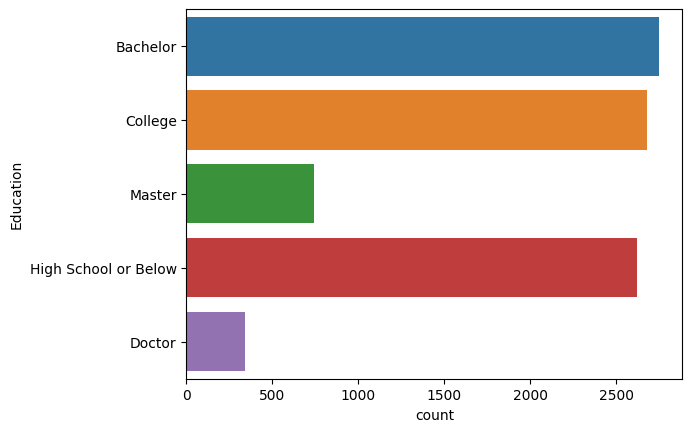

In [39]:
sns.countplot(y=df["Education"])
plt.show()

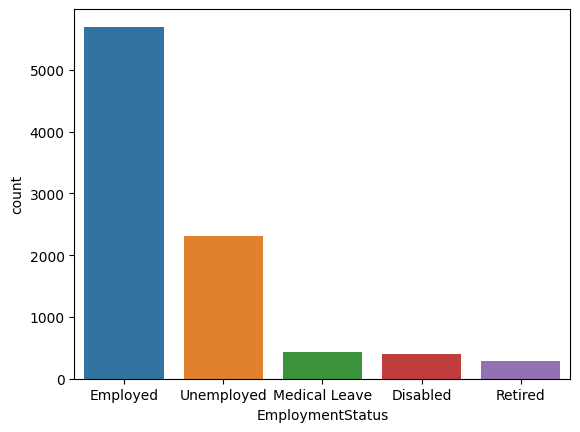

In [40]:
sns.countplot(x=df["EmploymentStatus"])
# plt.savefig("empstatus.png")
plt.show()

In [41]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

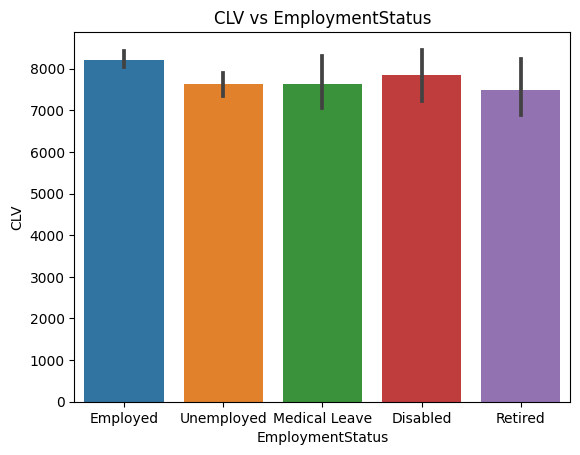

In [42]:
sns.barplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
# plt.savefig("bi1.png")
plt.show()

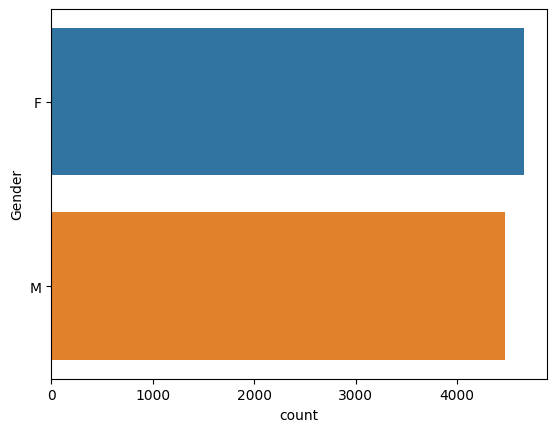

In [43]:
sns.countplot(y=df["Gender"])
plt.show()

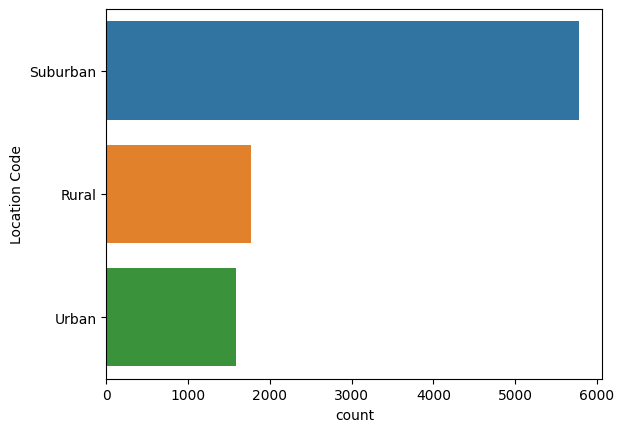

In [44]:
sns.countplot(y=df["Location Code"])
#plt.savefig("location.png")
plt.show()

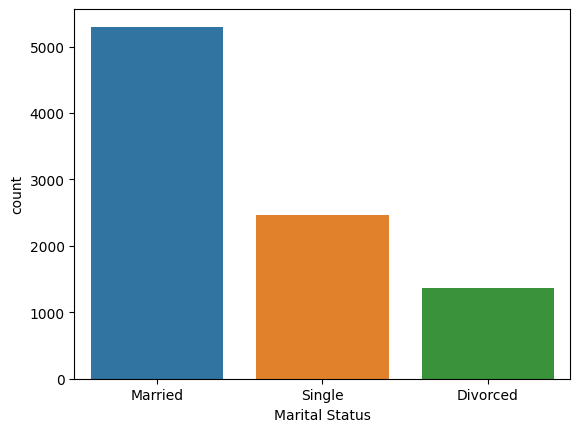

In [45]:
sns.countplot(x=df["Marital Status"])
plt.show()

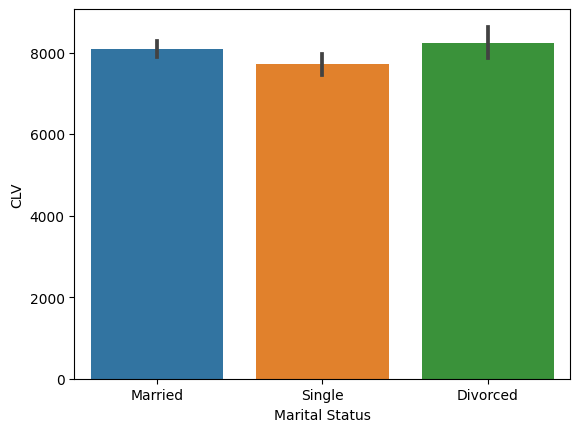

In [46]:
sns.barplot(x=df["Marital Status"],y=df["CLV"])
plt.show()

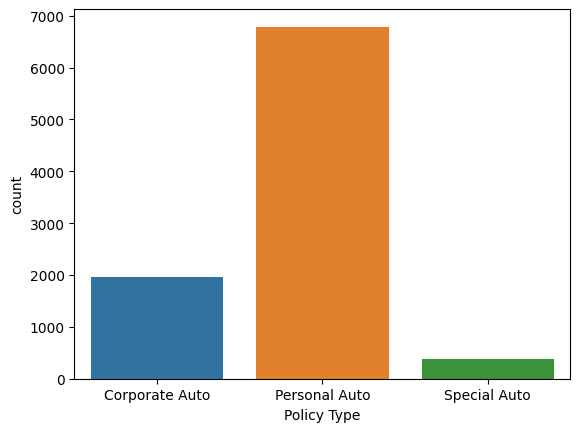

In [47]:
sns.countplot(x=df["Policy Type"])
plt.show()

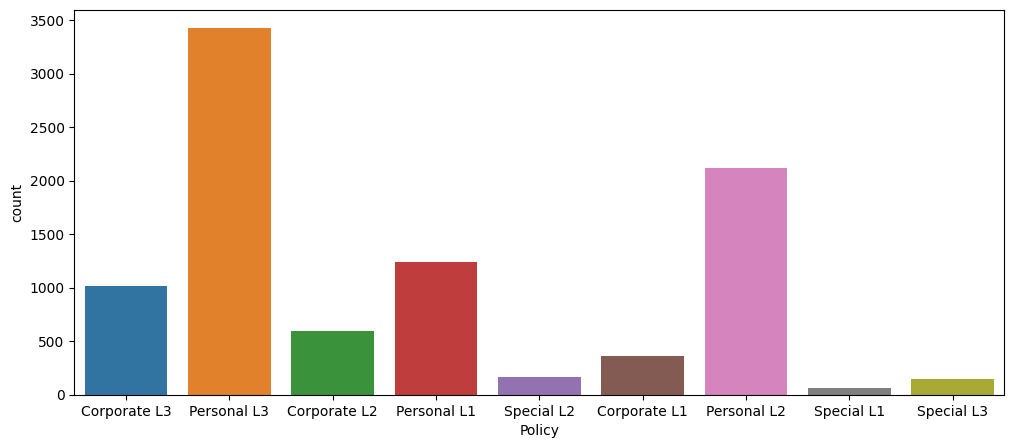

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x=df["Policy"])
plt.show()

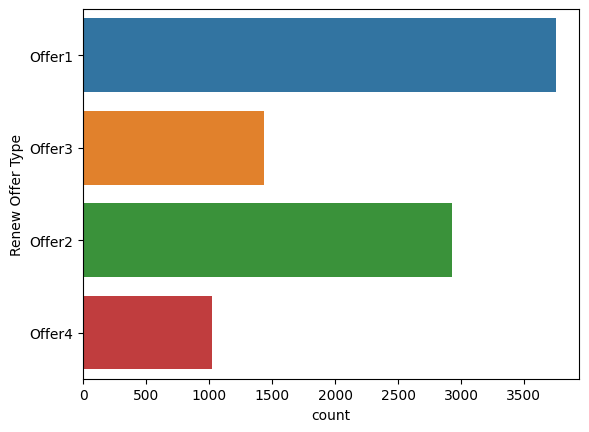

In [49]:
sns.countplot(y=df["Renew Offer Type"])
plt.show()

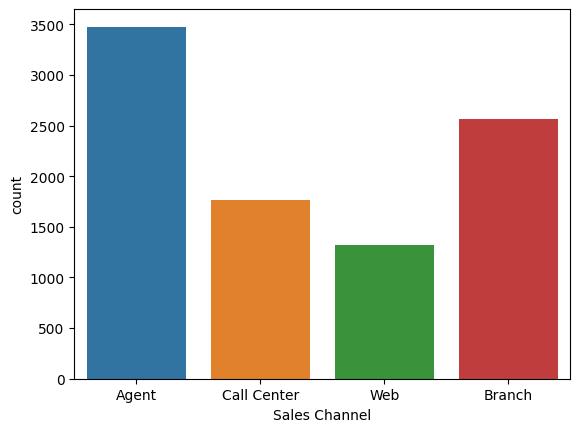

In [50]:
sns.countplot(x=df["Sales Channel"])
plt.show()

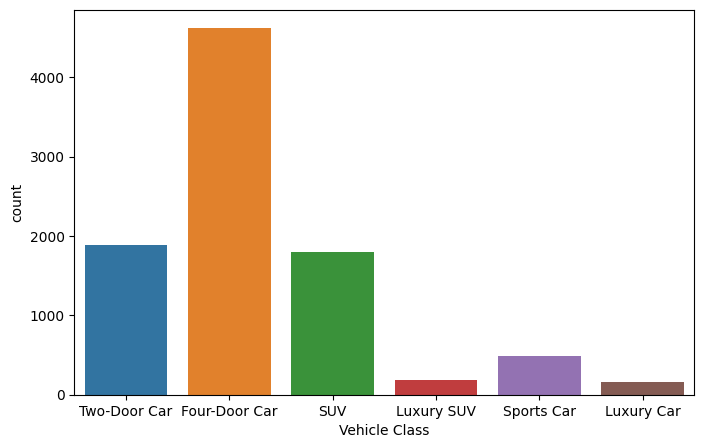

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Vehicle Class"])
plt.show()

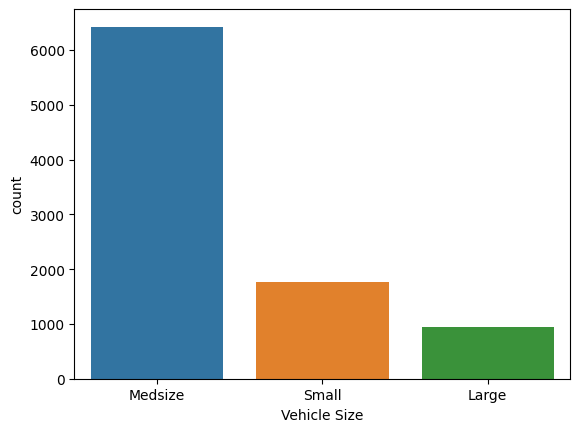

In [52]:
sns.countplot(x=df["Vehicle Size"])
plt.show()

In [53]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)
df["Months"] = df["Effective To Date"].dt.month
df['Months'] = df['Months'].astype('object')

In [54]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [55]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# Heat Map

In [56]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

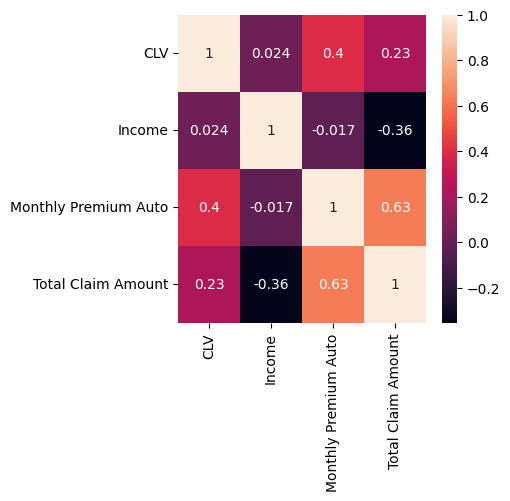

In [57]:
plt.figure(figsize=(4,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

# Statistical Significance
H0:The null hypothesis of the test is the data is normally distributed

HA:The data is not normally distributed

In [58]:
stats.shapiro(df['CLV'])

C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

In [59]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [60]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


In [61]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\1402015175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yes)
C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\1402015175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no)


<AxesSubplot: xlabel='CLV', ylabel='Density'>

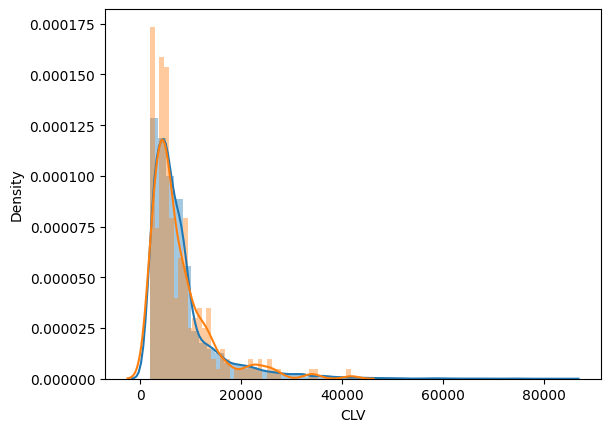

In [62]:
sns.distplot(yes)
sns.distplot(no)

In [63]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [64]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [65]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

H0:the mean ranks of the groups are the same.

H1:the mean ranks of the groups are not the same.

In [66]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [67]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


p-value > 0.05 failed to reject H0

In [68]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [69]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\4261252004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ba,hist=False,label='Basic')
C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\4261252004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ex,hist=False)
C:\Users

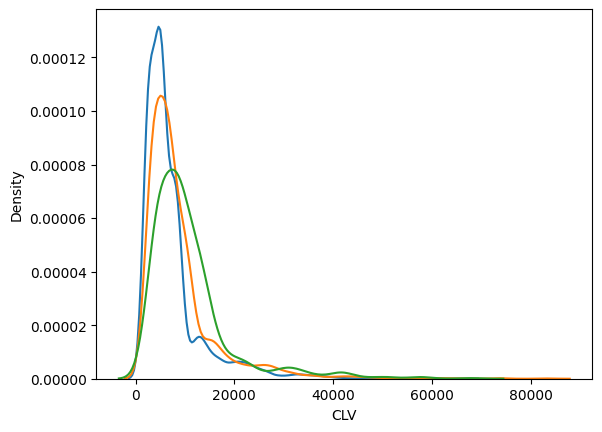

In [70]:
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.show()

In [71]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


p-value < 0.05 to reject H0

In [72]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [73]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\613139579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ba,hist=False,label='Bachelor')
C:\Users\abhin\AppData\Local\Temp\ipykernel_20900\613139579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Co,hist=False,label='C

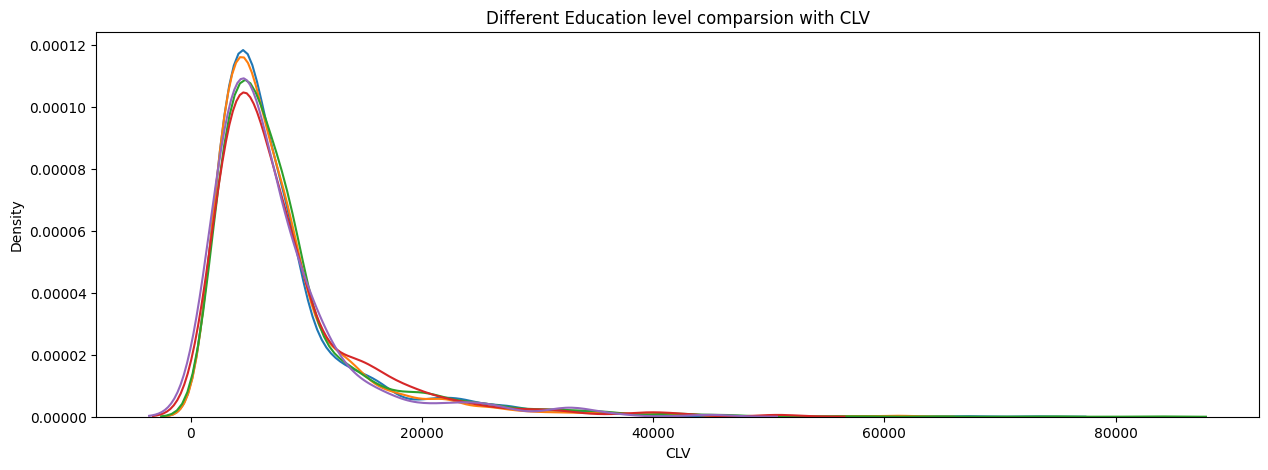

In [74]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")
plt.show()

p-value < 0.05 reject H0, Education is significant in predicting CLV

In [75]:
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [76]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


p-value < 0.05 reject H0, Location Code can be significant in predicting CLV

In [77]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [78]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [79]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [80]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.09988364526941682)


p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [81]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [82]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.1961448819126843e-36)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [83]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.21302721572099026)


p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [84]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [85]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [86]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [87]:
cat_cols.drop("Customer",axis=1,inplace=True)
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [88]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.09988364526941682,
 0.4389248352544014,
 2.1961448819126843e-36,
 0.21302721572099026,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [89]:
len(p_values)


16

In [90]:
len(cat_cols.columns)


16

In [91]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


In [92]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [93]:
catg=pd.get_dummies(cat_cols,drop_first=True)
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [94]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Model Building

# Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [97]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.25484160264997946


In [98]:
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [100]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.577231415348726
MAE 0.4455033282270872
R-squared: 0.25484160264997946


# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [103]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# RandomForest

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 


RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


# Hyperparameter Tuning for RadomForest

In [106]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_


C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 200}

In [111]:
rf = RandomForestRegressor(**grid.best_params_)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE: 0.1967372784531358
MAE 0.08921197024324734
R-squared: 0.9134390527694404


In [112]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.672443
Monthly Premium Auto,0.231076
Total Claim Amount,0.014456
Months Since Policy Inception,0.012632
Income,0.012591
Months Since Last Claim,0.012135
Coverage_Extended,0.003488
Number of Open Complaints,0.003420
EmploymentStatus_Employed,0.002847
Renew Offer Type_Offer2,0.001935


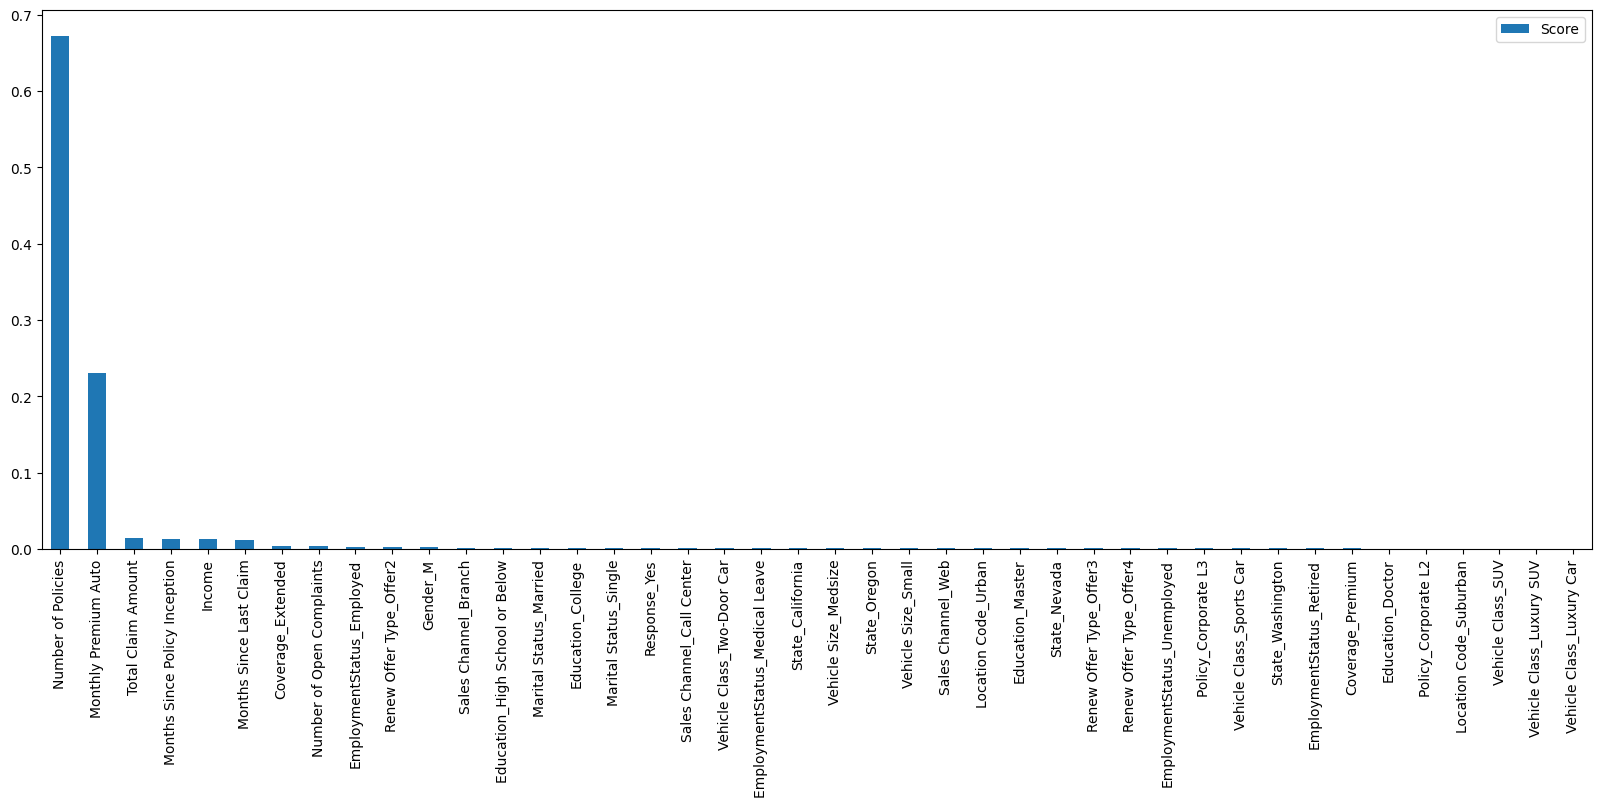

In [113]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

No of Policies and Monthly Premium are the most important features in predicting CLV